In [1]:
import torch

## PyTorch Workflow 

In [2]:
what_we_are_covering = {
    1: "data (prepare and load",
    2: "build model",
    3: "fitting the model to the  (training)",
    4: "making predictions and evalating a model (inference)", 
    5: "saving and loading a model",
    6: "putting it all together"
                       }

In [3]:
import torch 
from torch import nn # nn contains all of PyTorch's building blocks for neural networks 
import matplotlib.pyplot as plt 

torch.__version__

'2.6.0+cu124'

## 1. Data (preparing and loading)

ML is a game of two parts:
1. get data into a numerical representation
2. build a model to learn patterns in that numerical representation

We'll use a linear regression formula to make a stright line with known **parameters**
1. weight = 0.7
2. bias = 0.3

In [4]:
weight = 0.7 
bias = 0.3 

start = 0
end = 1
step = 0.02 
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias 

# input, output values 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X), len(y)

(50, 50)

## Splitting Data into Training and Test sets
* training set : course material
* validation set : practice exam
* test set : final exam -> test generalization
**Generalization**: the ability for a ML model to perform well on data it hasn't seen befor e

In [6]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How can we better visualiza our data?

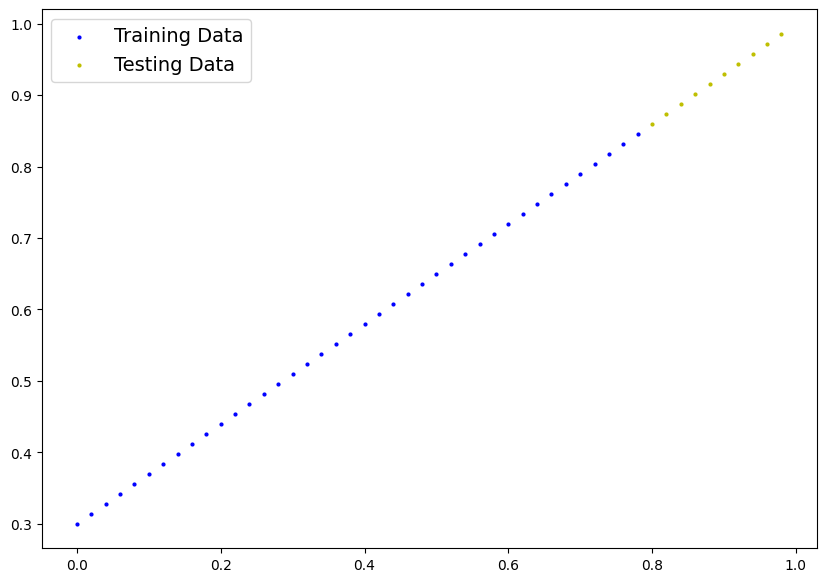

In [8]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test, 
                     predictions = None):
    """
    Plots training data, test data and compares predictions
    """
    
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

    plt.scatter(test_data, test_labels, c="y", s=4, label="Testing Data")

    if predictions is not None :
        plt.scatter(test_data, predictions, c="r", label="Predictions")

    plt.legend(prop={"size":14})


plot_predictions()

# Model Building
what our model does:
* start with random values (weight and bias)
* look at training data and adjust the random values to better represent the ideal values

Two main algorithms: 
1. Gradient descent
2. Backpropagation

In [9]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

## PyTorch model building essentials 

* torch.nn contains all of the buildings for computational graphs (a NN can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, oftern a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all NN modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent

### let's take a look at what's *inside* the model

In [10]:
# random seed 
torch.manual_seed(42)

# create an instance of the model (subclass of nn.Module)
model_0 = LinearRegressionModel()

# check out the parameters 
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using torch.inference_mode()
To check our model's predictive power, let's see how well it predicts y_test based on X_test.
When we pass data through our model, it's goind to run it through the forward method 

In [12]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

*torch.inference_mode()* (== torch.no_grad()) -> it turns off the gradient tracking. The predictions will be faster. Stuff we don't need are not going to be tracked. Long story short: it makes things faster 

In [13]:
# make predictions 
with torch.inference_mode():
    y_preds = model_0(X_test) 

# we'd like to have y_preds as close as possible to y_test
# but now the parameters of our model are just random numbers 
y_preds 

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

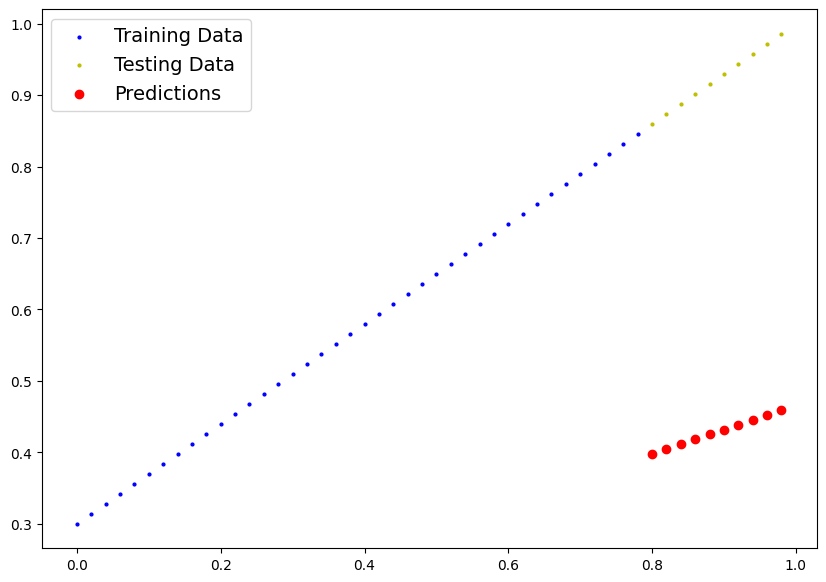

In [15]:
plot_predictions(predictions=y_preds)
# we'd like red dots to be on top of yellow dots

## [](http://)Train model 
The whole idea of training is for a model to move from some unknown parameters (these may be random) to some *known* parameters.

## Loss functions
may also be called cost functions or criteria in different areas. 
* **loss function** : it measures how wrong your model's predictions are to the ideal outputs, lower is better
* **optimizer** : takes into account the loss of a model and adjusts the model's parameters (weight & bias) to improve the loss function

And specifically for PyTorch we need 
* a training loop
* a testing loop


In [16]:
model_0.state_dict(), list(model_0.parameters())

(OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]),
 [Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)])

## L1 Loss (MAE)
mean absolute error : **torch.nn.L1Loss**

## torch.optim : optimizers 
* SGD, Adam: probably the more popular
* SGD: stochastic (random) gradient descent 

In [17]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer -> find parameters to minimize the loss function
# stochastic gradient descent 
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.01 # learning rate = possibly the most important hyperparameter we can set
)

### Building a training loop in PyTorch
0. Loop though the data and do :
1. Forward pass: it involves data moving through our model's forward functions to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of out model wrt the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [18]:
torch.manual_seed(42)

# an epoch is one loop though the data (#epochs is an hyperparameter)
epochs = 1 

# loop though the data 
for epoch in range(epochs):
    # set the model to training mode 
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1. Forward pass 
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")

    # 3. Optimizer zero grad 
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss wrt the parameters of the model
    loss.backward()

    # 5. Optimizer step: Perform gradient descent 
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so we have to zero them above in step 3 for the next iteration of the loop
    
    model_0.eval() # turns off gradient tracking 

    print(model_0.state_dict())

Loss: 0.31288138031959534
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])


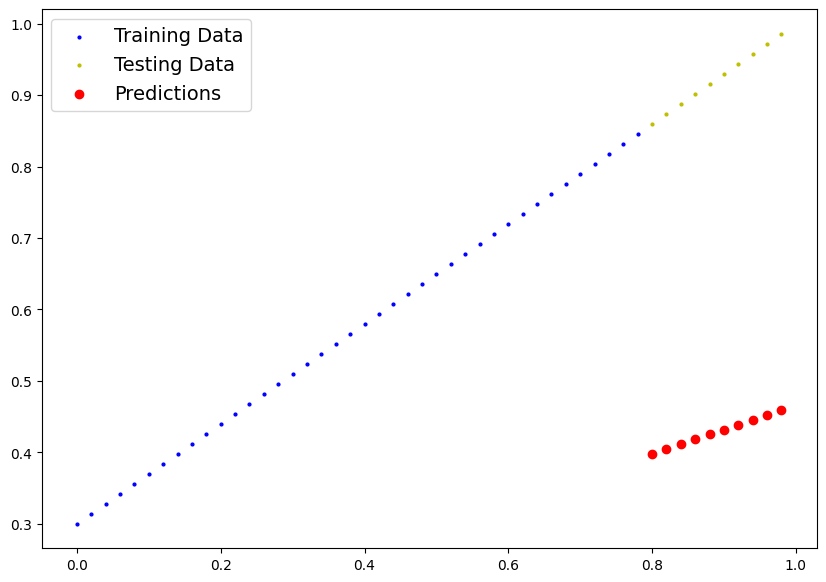

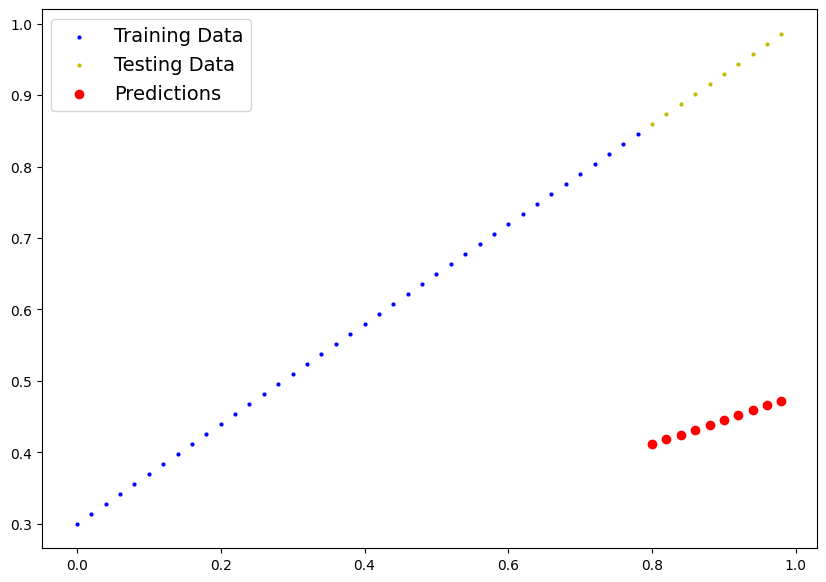

In [19]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds)
plot_predictions(predictions=y_preds_new)

In [20]:
weight, bias

(0.7, 0.3)